In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pickle

In [3]:
df=pd.read_csv('test.csv')

In [4]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    9757
Good        5802
Bad         5654
_           5246
Name: count, dtype: int64

In [7]:
df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan'],inplace=True) # removing useless columns

In [8]:
df['Age']=df['Age'].str.strip('_') # stripping '-' character

In [9]:
df['Age']=df['Age'].astype(float) # converting data type float

In [10]:
df=df[df['Occupation']!='_______'] # removing the values '_______' from the occupation column

In [11]:
df['Annual_Income']=df['Annual_Income'].str.strip('_') # stripping '-' character

In [12]:
df['Annual_Income']=df['Annual_Income'].astype(float) # converting datatype

In [13]:
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].astype(float) # converting datatype

In [14]:
df['Num_of_Loan']=df['Num_of_Loan'].str.strip('_') # stripping '-' character

In [15]:
df['Num_of_Loan']=df['Num_of_Loan'].astype(float) # converting datatype

In [16]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.strip('_') # stripping '-' character

In [17]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float) # converting datatype

In [18]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.strip('_') # stripping '-' character

In [19]:
df=df[df['Changed_Credit_Limit']!=''] # removing blank space from the column 

In [20]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float) # converting datatype

In [21]:
df=df[df['Credit_Mix']!='_'] # removing '-' character from the columns

In [22]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.strip('_') # stripping '-' character

In [23]:
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float) # converting datatype

In [24]:
df=df[df['Payment_of_Min_Amount']!='NM'] # removing irrelavant character from the columns since it is a boolean column

In [25]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.strip('_') # stripping '-' character

In [26]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float) # converting datatype

In [27]:
df['Monthly_Balance']=df['Monthly_Balance'].str.strip('_') # stripping '-' character

In [28]:
df['Monthly_Balance']=df['Monthly_Balance'].astype(float) # converting datatype

IQR Method

In [29]:
iqr_dict={}
for i in df:
  if df[i].dtype in [int,float]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    min_range=q1-(1.5*iqr)
    max_range=q3+(1.5*iqr)
    iqr_dict[i]=(min_range,max_range)
iqr_dict

{'Age': (np.float64(-0.5), np.float64(67.5)),
 'Annual_Income': (np.float64(-57754.87750000001), np.float64(146458.9425)),
 'Monthly_Inhand_Salary': (np.float64(-4620.501249999998),
  np.float64(11893.535416666664)),
 'Num_Bank_Accounts': (np.float64(-2.0), np.float64(14.0)),
 'Num_Credit_Card': (np.float64(-0.5), np.float64(11.5)),
 'Interest_Rate': (np.float64(-13.0), np.float64(43.0)),
 'Num_of_Loan': (np.float64(-4.0), np.float64(12.0)),
 'Delay_from_due_date': (np.float64(-16.0), np.float64(56.0)),
 'Num_of_Delayed_Payment': (np.float64(-6.0), np.float64(34.0)),
 'Changed_Credit_Limit': (np.float64(-9.28), np.float64(30.08)),
 'Num_Credit_Inquiries': (np.float64(-4.0), np.float64(20.0)),
 'Outstanding_Debt': (np.float64(-1669.1175000000003), np.float64(4394.5825)),
 'Credit_Utilization_Ratio': (np.float64(15.468079372165995),
  np.float64(48.89557197052333)),
 'Total_EMI_per_month': (np.float64(-165.3502450625721),
  np.float64(390.0444805438806)),
 'Amount_invested_monthly': (np.

In [30]:
df=df[(df['Age']>0) & (df['Age']<100)] # there are ages which are negative and greater than 100 

In [31]:
df=df[(df['Num_Bank_Accounts']>0) & (df['Num_Bank_Accounts']<11)] # filtering out the relevant values 

In [32]:
df=df[(df['Num_Credit_Card']>0) & (df['Num_Credit_Card']<11)] # filtering out the relevant values

In [33]:
df=df[(df['Interest_Rate']>0) & (df['Interest_Rate']<=iqr_dict['Interest_Rate'][1])] # filtering out the relevant values using iqr method

In [34]:
df=df[(df['Num_of_Loan']>0) & (df['Num_of_Loan']<=12)] # filtering out the relevant values

In [35]:
df=df[df['Delay_from_due_date']>0] # filtering out the relevant values

In [36]:
df=df[(df['Num_of_Delayed_Payment']>=0) & (df['Num_of_Delayed_Payment']<=34)] # filtering out the relevant values

In [37]:
df=df[(df['Num_Credit_Inquiries']>0) & (df['Num_Credit_Inquiries']<=20)] # filtering out the relevant values

In [38]:
# df['Outstanding_Debt'] is in US dollars
df=df[df['Outstanding_Debt']>12] # filtering out the relevant values

In [39]:
df['Credit_History_Age'].unique()

array(['22 Years and 10 Months', '27 Years and 4 Months',
       '18 Years and 6 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '19 Years and 10 Months', '27 Years and 6 Months',
       '27 Years and 7 Months', '18 Years and 11 Months',
       '19 Years and 1 Months', '18 Years and 10 Months',
       '19 Years and 0 Months', '10 Years and 9 Months',
       '10 Years and 10 Months', '11 Years and 0 Months',
       '12 Years and 11 Months', '18 Years and 8 Months',
       '18 Years and 9 Months', '14 Years and 4 Months',
       '14 Years and 6 Months', '14 Years and 7 Months',
       '20 Years and 0 Months', '20 Years and 1 Months',
       '30 Years and 11 Months', '31 Years and 2 Months',
       '19 Years and 7 Months', '9 Years and 4 Months',
       '9 Years and 5 Months', '13 Years and 9 Months',
       '13 Years and 11 Months', '22 Years and 2 Months',
       '28 Years and 10 

In [40]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: (int(re.search(r'(\d+)\s*[yY]ears?', x).group(1)) * 12) + int(re.search(r'(\d+)\s*[nM]onths?',x).group(1)))

In [41]:
df.rename({'Credit_History_Age':'Credit_History_Age(in months)'},inplace=True) # for better understanding renaming the column name

In [42]:
df['Total_EMI_per_month'] # in US Dollars

1         49.574949
5         18.816215
9        246.992319
12        16.415452
14        16.415452
            ...    
49966     28.182033
49976    362.072453
49992     60.964772
49993     60.964772
49997     35.104023
Name: Total_EMI_per_month, Length: 13318, dtype: float64

In [43]:
df=df[df['Total_EMI_per_month']>12]  # filtering out the relevant values

In [44]:
df=df[df['Payment_Behaviour']!='!@9#%8'] # removing the irrelevant values

In [45]:
df[df['Monthly_Balance']<0]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
17036,September,38.0,Media_Manager,29588.18,2281.681667,3,4,1,3.0,9,...,3.0,Good,193.06,28.385089,247,No,61.709502,70.725651,High_spent_Small_value_payments,-3.333333e+26


In [46]:
df=df[df['Monthly_Balance']>0] # removing negative values

In [47]:
df1=df.copy()

ANALYSIS


In [98]:
df1['Credit_Mix'].value_counts()

Credit_Mix
Standard    5790
Bad         3548
Good        2723
Name: count, dtype: int64

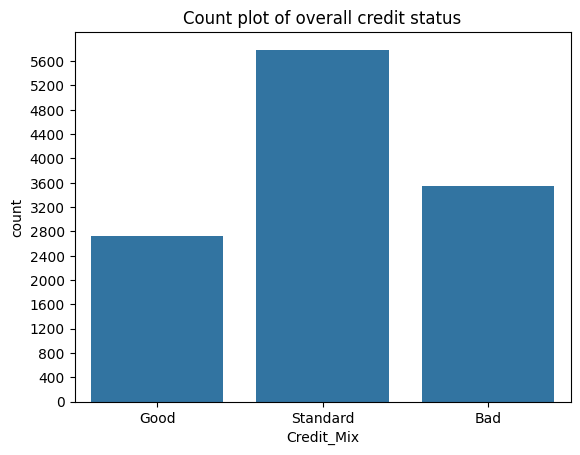

In [ ]:
sns.countplot(x=df1['Credit_Mix'])
plt.title('Count plot of overall credit status')
plt.yticks(range(0,6000,400))
plt.show()

In [107]:
z=df1.groupby('Credit_Mix')[['Outstanding_Debt']].mean().sort_values(by='Outstanding_Debt')
z

,Outstanding_Debt
Credit_Mix,
Good,743.040342
Standard,1125.145212
Bad,2988.870896


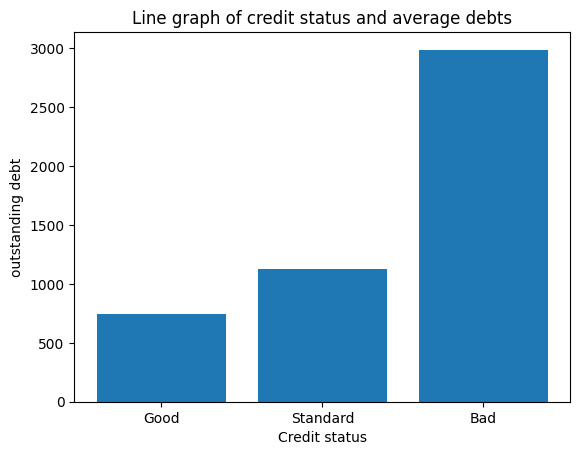

In [108]:
plt.bar(z.index,z['Outstanding_Debt'])
plt.xlabel('Credit status')
plt.ylabel('outstanding debt')
plt.title('Line graph of credit status and average debts')
plt.show()

In [110]:
z=df1.groupby(['Credit_Mix'])['Interest_Rate'].mean().sort_values()
z

Credit_Mix
Good         6.399559
Standard    15.145769
Bad         24.396561
Name: Interest_Rate, dtype: float64

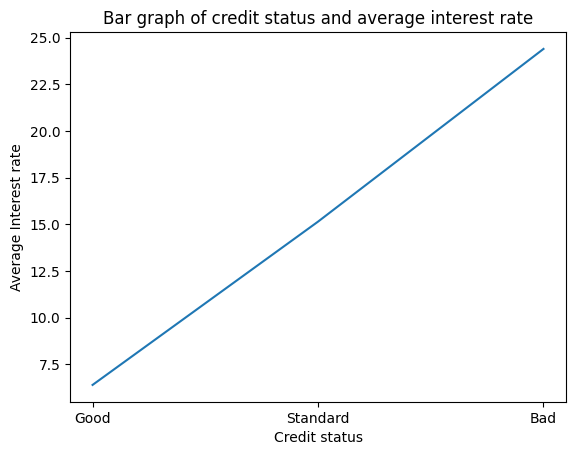

In [111]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average Interest rate')
plt.title('Bar graph of credit status and average interest rate')
plt.show()

In [117]:
z=df1.groupby('Credit_Mix')['Monthly_Inhand_Salary'].mean().sort_values()
z

Credit_Mix
Bad         2675.903011
Standard    3901.471954
Good        5707.602086
Name: Monthly_Inhand_Salary, dtype: float64

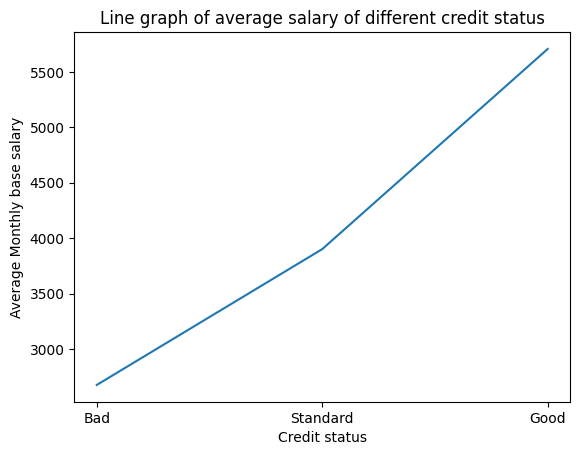

In [119]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average Monthly base salary')
plt.title('Line graph of average salary of different credit status')
plt.show()

In [127]:
z=df1.groupby(['Credit_Mix'])['Num_of_Loan'].sum().sort_values()
z

Credit_Mix
Good         6927.0
Standard    20630.0
Bad         22559.0
Name: Num_of_Loan, dtype: float64

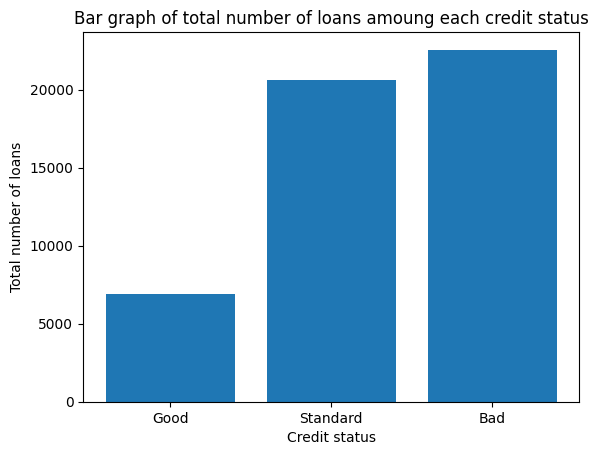

In [128]:
plt.bar(z.index,z)
plt.xlabel("Credit status")
plt.ylabel('Total number of loans')
plt.title("Bar graph of total number of loans amoung each credit status")
plt.show()

In [131]:
z=df1.groupby(['Credit_Mix'])['Delay_from_due_date'].mean().sort_values()
z

Credit_Mix
Good        10.754315
Standard    19.727979
Bad         38.373168
Name: Delay_from_due_date, dtype: float64

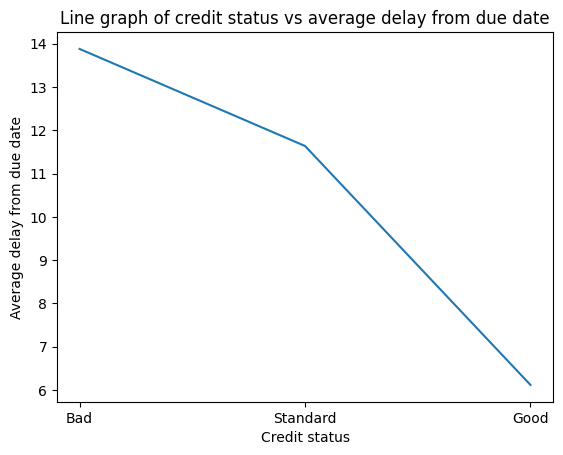

In [143]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average delay from due date')
plt.title('Line graph of credit status vs average delay from due date')
plt.show()

In [53]:
df1.groupby(['Payment_of_Min_Amount','Credit_Mix'])[['Credit_Mix']].count()

Credit_Mix
Payment_of_Min_Amount Credit_Mix            
No                    Good              2723
                      Standard          1099
Yes                   Bad               3548
                      Standard          4691

In [54]:
df1.groupby('Credit_Mix')[['Monthly_Balance']].mean()

,Monthly_Balance
Credit_Mix,
Bad,280.772860
Good,488.652959
Standard,381.204095


In [ ]:
z=df1.groupby('Credit_Mix')['Changed_Credit_Limit'].mean().sort_values(ascending=False)
z
# Changed_Credit_Limit => Represents the percentage change in credit card limit

Credit_Mix
Bad         13.877647
Standard    11.636473
Good         6.119423
Name: Changed_Credit_Limit, dtype: float64

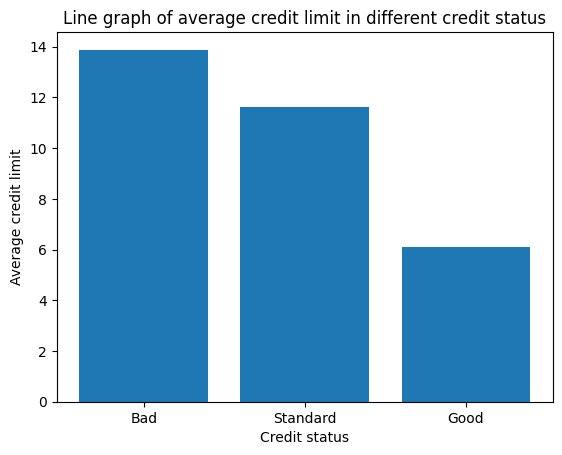

In [ ]:
plt.bar(z.index,z)
plt.xlabel('Credit status')
plt.ylabel('Average credit limit')
plt.title('Line graph of average credit limit in different credit status')
plt.show()
# insight -> bad credit status tries to improve their credit score

In [57]:
df1.groupby(['Credit_Mix','Payment_of_Min_Amount'])[['Num_of_Delayed_Payment']].sum()

Num_of_Delayed_Payment
Credit_Mix Payment_of_Min_Amount                        
Bad        Yes                                   70836.0
Good       No                                    19887.0
Standard   No                                    15418.0
           Yes                                   65754.0

In [58]:
df1.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [59]:
df1.groupby(['Credit_Mix','Month'])[['Month']].count()

Month
Credit_Mix Month           
Bad        December     849
           November     921
           October      867
           September    911
Good       December     709
           November     685
           October      662
           September    667
Standard   December    1486
           November    1458
           October     1407
           September   1439

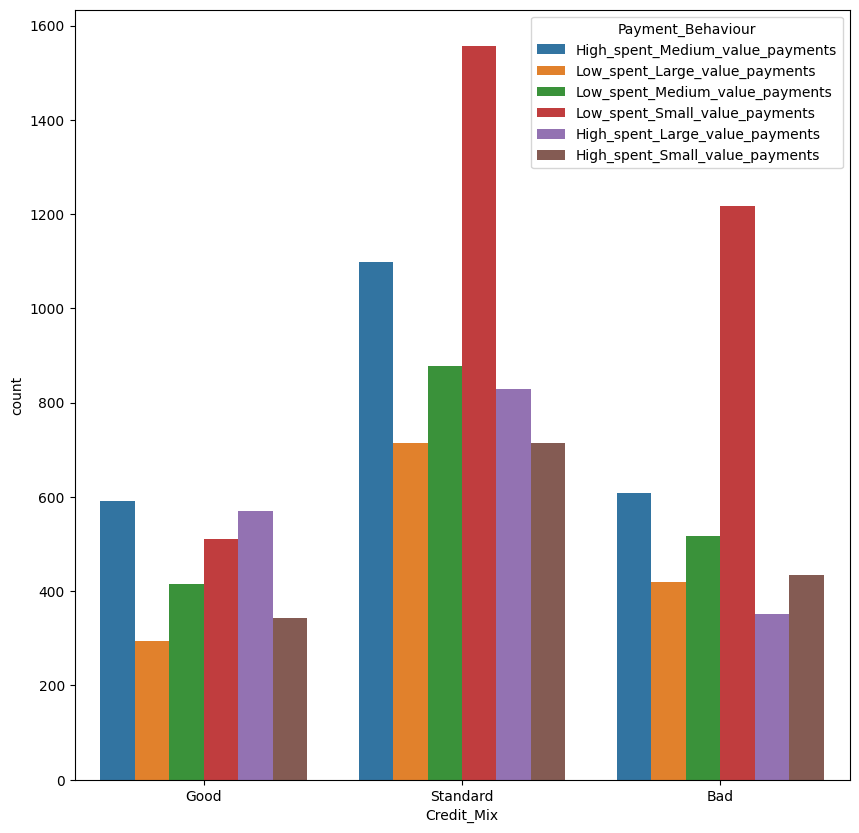

In [60]:
plt.figure(figsize=(10,10))
sns.countplot(x=df1['Credit_Mix'],hue=df1['Payment_Behaviour'])
plt.show()

In [61]:
df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
1,October,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,Good,809.98,33.053114,274,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
5,October,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,5.0,Good,605.03,30.116600,328,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
9,October,35.0,Engineer,143162.64,12187.220000,1,5,8,3.0,6,...,3.0,Good,1303.01,35.685836,222,No,246.992319,453.615131,Low_spent_Large_value_payments,788.114550
12,September,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,...,4.0,Good,632.46,39.377219,215,No,16.415452,69.107006,High_spent_Medium_value_payments,425.726626
14,November,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,...,4.0,Good,632.46,36.824468,217,No,16.415452,191.886244,Low_spent_Medium_value_payments,332.947388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49966,November,39.0,Manager,15319.65,1460.637500,6,7,15,4.0,53,...,6.0,Bad,1453.61,25.497671,139,Yes,28.182033,28.514703,High_spent_Large_value_payments,329.367014
49976,September,21.0,Architect,38321.39,3106.647859,4,4,3,4.0,11,...,6.0,Good,678.57,29.004432,211,No,362.072453,79.991128,High_spent_Large_value_payments,381.182642
49992,September,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,9.0,Bad,3571.70,32.391288,76,Yes,60.964772,107.210742,Low_spent_Small_value_payments,314.815153
49993,October,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,12.0,Bad,3571.70,37.528511,77,Yes,60.964772,71.794421,Low_spent_Small_value_payments,350.231473


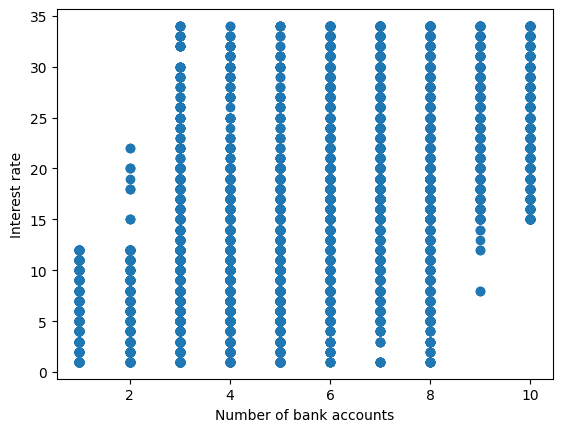

In [62]:
plt.scatter(df1['Num_Bank_Accounts'],df1['Interest_Rate'])
plt.xlabel('Number of bank accounts')
plt.ylabel('Interest rate')
plt.show()

Ordinal Encoding for month

In [63]:
month=OrdinalEncoder(categories=[['September', 'October', 'November', 'December']])
df['Month']=month.fit_transform(df[['Month']])

Ordinal encoding for occupation

In [64]:
occupation=LabelEncoder()
df['Occupation']=occupation.fit_transform(df['Occupation'])

Ordinal Encoding in credit_mix

In [65]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [66]:
credit_mix=OrdinalEncoder(categories=[['Bad','Standard','Good']])
df['Credit_Mix']=credit_mix.fit_transform(df[['Credit_Mix']])

Ordinal encoding in Payment_Behaviour

In [67]:
df['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [68]:
behavior=OrdinalEncoder(categories=[['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments','High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']])
df['Payment_Behaviour']=behavior.fit_transform(df[['Payment_Behaviour']])

In [69]:
Payment_of_Min_Amount=LabelEncoder()
df['Payment_of_Min_Amount']=Payment_of_Min_Amount.fit_transform(df['Payment_of_Min_Amount'])

In [70]:
df['Interest_Rate'].dtype

dtype('int64')

Checking for negative or any outliers

In [71]:
for i in df:
  if df[i].dtype in [int,float]:
    print(f"Minimum value of {i}:",df[i].min())
    print(f'Maximum_value of {i}:',df[i].max())
    print()

Minimum value of Month: 0.0
Maximum_value of Month: 3.0

Minimum value of Age: 14.0
Maximum_value of Age: 95.0

Minimum value of Occupation: 0
Maximum_value of Occupation: 14

Minimum value of Annual_Income: 7005.93
Maximum_value of Annual_Income: 23994243.0

Minimum value of Monthly_Inhand_Salary: 303.6454166666666
Maximum_value of Monthly_Inhand_Salary: 15167.18

Minimum value of Num_Bank_Accounts: 1
Maximum_value of Num_Bank_Accounts: 10

Minimum value of Num_Credit_Card: 1
Maximum_value of Num_Credit_Card: 10

Minimum value of Interest_Rate: 1
Maximum_value of Interest_Rate: 34

Minimum value of Num_of_Loan: 1.0
Maximum_value of Num_of_Loan: 9.0

Minimum value of Delay_from_due_date: 1
Maximum_value of Delay_from_due_date: 67

Minimum value of Num_of_Delayed_Payment: 0.0
Maximum_value of Num_of_Delayed_Payment: 28.0

Minimum value of Changed_Credit_Limit: -6.4
Maximum_value of Changed_Credit_Limit: 35.81

Minimum value of Num_Credit_Inquiries: 1.0
Maximum_value of Num_Credit_Inquir

In [72]:
df.drop(index=df[df['Age']==95].index,inplace=True) 

Modeling

In [73]:
x=df.drop(columns=['Credit_Mix'])
y=df['Credit_Mix']

In [74]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [76]:
models=[KNeighborsClassifier(),SVC(),MultinomialNB(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(random_state=42),XGBClassifier(random_state=42)]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'Train data-{str(model).split('(')[0]}:',model.score(x_train,y_train)*100)
  print(f'Test data-{str(model).split('(')[0]}:',accuracy_score(y_test,y_pred)*100)
  print()

Train data-KNeighborsClassifier: 93.44941956882255
Test data-KNeighborsClassifier: 90.74074074074075

Train data-SVC: 93.98246860933428
Test data-SVC: 92.92426755113323

Train data-MultinomialNB: 80.6562425965411
Test data-MultinomialNB: 81.53676064123825

Train data-DecisionTreeClassifier: 100.0
Test data-DecisionTreeClassifier: 93.06246545052515

Train data-RandomForestClassifier: 100.0
Test data-RandomForestClassifier: 95.6882255389718

Train data-GradientBoostingClassifier: 96.12651030561479
Test data-GradientBoostingClassifier: 94.47208402432284

Train data-AdaBoostClassifier: 84.9680170575693
Test data-AdaBoostClassifier: 84.5771144278607

Train data-XGBClassifier: 100.0
Test data-XGBClassifier: 96.04754007739082



feature selection using wrapper selection method

In [77]:
x=df.drop(columns='Credit_Mix')
y=df['Credit_Mix']

In [78]:
model=RandomForestClassifier(random_state=42)
rfe=RFE(model,n_features_to_select=11)
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=11)

In [79]:
rfe.get_support()

array([False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False])

In [80]:
x.columns[rfe.get_support()]

Index(['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount'],
      dtype='object')

In [81]:
x=df[x.columns[rfe.get_support()]]

In [82]:
# bad -0
# standard -1
# good -2

# no -0
# yes -1

In [83]:
z=x.copy()
z['credit_mix']=y


In [84]:
z[(z['credit_mix']==2)]

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,credit_mix
1,19114.12,3,4,3,4.0,3,9.0,13.27,809.98,274,0,2.0
5,34847.84,2,4,6,1.0,3,3.0,5.42,605.03,328,0,2.0
9,143162.64,1,5,8,3.0,6,3.0,2.10,1303.01,222,0,2.0
12,30689.89,2,5,4,1.0,5,6.0,1.99,632.46,215,0,2.0
14,30689.89,2,5,4,1.0,5,6.0,1.99,632.46,217,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49951,41329.56,2,3,7,1.0,2,10.0,13.66,1245.01,290,0,2.0
49956,20059.98,8,5,12,4.0,25,11.0,2.97,909.01,203,0,2.0
49957,20059.98,8,5,12,4.0,25,14.0,2.97,909.01,204,0,2.0
49976,38321.39,4,4,3,4.0,11,7.0,1.59,678.57,211,0,2.0


In [85]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [87]:
models=[KNeighborsClassifier(),SVC(),MultinomialNB(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(random_state=42),XGBClassifier(random_state=42)]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'Train data-{str(model).split('(')[0]}:',model.score(x_train,y_train)*100)
  print(f'Test data-{str(model).split('(')[0]}:',accuracy_score(y_test,y_pred)*100)
  print()

Train data-KNeighborsClassifier: 95.72376214167258
Test data-KNeighborsClassifier: 93.20066334991708

Train data-SVC: 93.63894811656006
Test data-SVC: 93.36650082918739

Train data-MultinomialNB: 69.08315565031982
Test data-MultinomialNB: 70.39800995024875

Train data-DecisionTreeClassifier: 100.0
Test data-DecisionTreeClassifier: 93.80873410724156

Train data-RandomForestClassifier: 100.0
Test data-RandomForestClassifier: 96.37921503593145

Train data-GradientBoostingClassifier: 96.00805496327884
Test data-GradientBoostingClassifier: 94.7208402432283

Train data-AdaBoostClassifier: 84.9680170575693
Test data-AdaBoostClassifier: 84.5771144278607

Train data-XGBClassifier: 100.0
Test data-XGBClassifier: 96.18573797678275



Hyper parameter tuning in RandomForestClassifier

In [88]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
accuracy_score(y_test,y_pred)*100

96.37921503593145

In [89]:
forest.score(x_train,y_train)*100

100.0

In [90]:
# params={'n_estimators':[50,100,150],'criterion':['gini','entropy','log_loss'],'max_depth':[7,8,9],'max_features':['sqrt','log2'],'random_state':[23,42]}
# clf=GridSearchCV(forest,params,cv=9,scoring='accuracy')
# clf.fit(x_train,y_train)

In [91]:
# y_pred=clf.predict(x_test)
# print("Accuracy_score:",accuracy_score(y_test,y_pred)*100)

pickling

In [92]:
dict1={'model':forest,'output':credit_mix,'Payment_of_Min_Amount':Payment_of_Min_Amount,'scaler':minmax}
with open('credit.pkl','wb') as obj1:
  pickle.dump(dict1,obj1)

In [93]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64

In [94]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64

In [95]:
x

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount
1,19114.12,3,4,3,4.0,3,9.0,13.27,809.98,274,0
5,34847.84,2,4,6,1.0,3,3.0,5.42,605.03,328,0
9,143162.64,1,5,8,3.0,6,3.0,2.10,1303.01,222,0
12,30689.89,2,5,4,1.0,5,6.0,1.99,632.46,215,0
14,30689.89,2,5,4,1.0,5,6.0,1.99,632.46,217,0
...,...,...,...,...,...,...,...,...,...,...,...
49966,15319.65,6,7,15,4.0,53,16.0,17.13,1453.61,139,1
49976,38321.39,4,4,3,4.0,11,7.0,1.59,678.57,211,0
49992,20002.88,10,8,29,5.0,33,25.0,18.31,3571.70,76,1
49993,20002.88,10,8,29,5.0,33,25.0,18.31,3571.70,77,1


In [96]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64